# Part g): Analysis of real data 

### Import libraries

In [1]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import git
import sys
sys.path.append("../")
import functions as f
path_to_root = git.Repo(".", search_parent_directories=True).working_dir
sys.path.append(path_to_root)
plt.style.use('seaborn-v0_8-whitegrid')

### Import terrain data

/tmp/ipykernel_19931/3556103769.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain1 = imread(path_to_root+"/data/SRTM_data_Norway_1.tif")


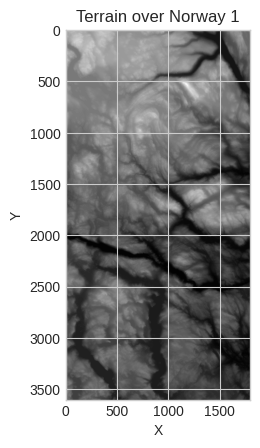

(3601, 1801)
<class 'imageio.core.util.Array'>


(1601, 1801)

In [2]:
# Load the terrain
terrain1 = imread(path_to_root+"/data/SRTM_data_Norway_1.tif")
# Show the terrain
plt.figure()
plt.title("Terrain over Norway 1")
plt.imshow(terrain1, cmap="gray")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
print(terrain1.shape)
print(type(terrain1))
terrain1[2000:3601,:].shape

### Analysis of terrain data

In [3]:
# Load the terrain data
terrain_data = imread(path_to_root+"/data/SRTM_data_Norway_1.tif")

# Define the x and y coordinates
#x = np.arange(0, terrain_data[2000:3601,:].shape[1], 10)
x = np.arange(0, terrain_data.shape[1], 10)
#y = np.arange(0, terrain_data[2000:3601,:].shape[0], 10)
y = np.arange(0, terrain_data.shape[0], 10)
# Create a meshgrid of the x and y coordinates
xv, yv = np.meshgrid(x, y)

# Sample z
#zv = terrain_data[2000:3601:10, ::10]
zv = terrain_data[::10, ::10]


/tmp/ipykernel_19931/2502318962.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain_data = imread(path_to_root+"/data/SRTM_data_Norway_1.tif")


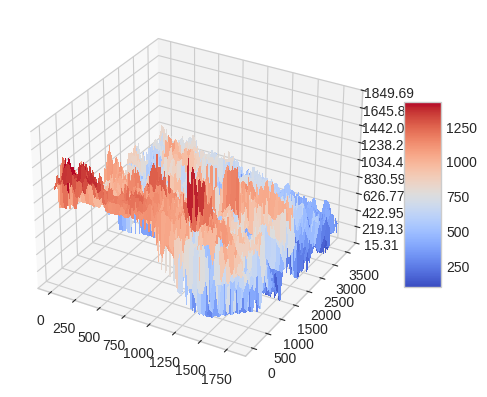

In [4]:
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(xv, yv, zv, cmap=cm.coolwarm,
linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(0,2000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [5]:
x = xv.flatten()
y = yv.flatten()
z = zv.flatten().reshape(-1, 1)
print(x.shape)
print(y.shape)
print(z.shape)

(65341,)
(65341,)
(65341, 1)


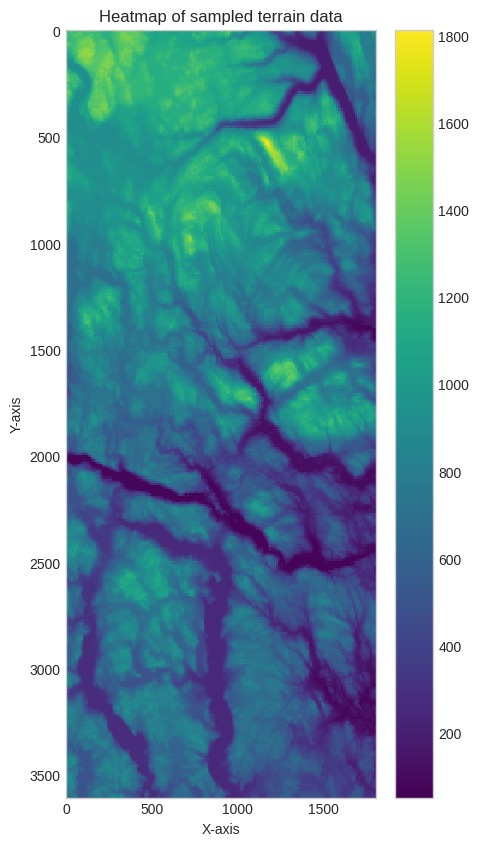

In [6]:
# Create the heatmap
aspect_ratio = xv.shape[1] / yv.shape[0]
plt.figure(figsize=(5, 5 / aspect_ratio))

heatmap = plt.pcolormesh(xv, yv, zv, shading='auto', cmap='viridis')

# Add color bar
plt.colorbar(heatmap)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap of sampled terrain data')
plt.gca().invert_yaxis()
# Show the plot
#f.save_to_results(filename = "sampled_data_heatmap.png")

# OLS Reproduction

In [7]:
degrees = np.arange(1, 15)

beta_values = []
mse_values = np.zeros(len(degrees))
R2_values = np.zeros(len(degrees))

for i, degree in enumerate(degrees): 
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X = poly_features.fit_transform(np.column_stack((x, y)))

    # Split the data into training and test data
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

    # Scale and center the data
    X_train, X_test = f.scale_train_test(train = X_train, test = X_test)
    z_train, z_test = f.scale_train_test(train = z_train, test = z_test)

    #Calculating OLSbeta, ztilde, mse and R2
    OLSbeta = f.beta_OLS(X_train, z_train)
    ztilde = f.z_predict(X_test, OLSbeta)
    mse = f.mse(z_test, ztilde)
    R2 = f.r2(z_test, ztilde)

    #Adding the values to the arrays

    beta_values.append(OLSbeta)
    mse_values[i] = mse
    R2_values[i] = R2

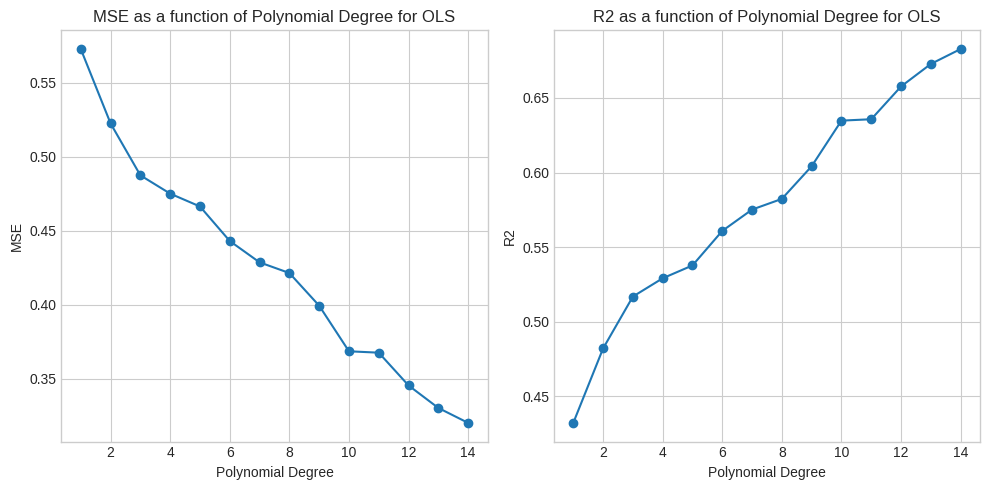

In [8]:
# Plotting MSE and R2 scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE as a function of Polynomial Degree for OLS')

plt.subplot(1, 2, 2)
plt.plot(degrees, R2_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.title('R2 as a function of Polynomial Degree for OLS')
plt.tight_layout()
plt.show()

## Retrieve the estimated z_values

In [9]:
#use the latest prediction as it has the best score 
ztilde = f.z_predict(X, OLSbeta)

In [10]:
ztildev = ztilde.flatten()
print(ztilde.shape)
ztildev = ztilde.reshape(361, 181)
print(ztildev.shape)

(65341, 1)
(361, 181)


In [11]:
# Do we have to scale the betavalues back? 

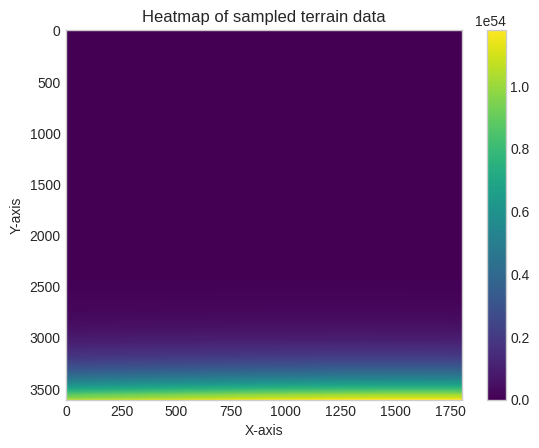

In [12]:
# Create the heatmap
#aspect_ratio = xv.shape[1] / yv.shape[0]
#plt.figure(figsize=(5, 5 / aspect_ratio))

heatmap = plt.pcolormesh(xv, yv, ztildev, cmap='viridis')

# Add color bar
plt.colorbar(heatmap)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap of sampled terrain data')
plt.gca().invert_yaxis()

degree 0 betavalues 3
[[ 0.        ]
 [-0.29890466]
 [-0.58615568]]
 
degree 1 betavalues 6
[[ 0.        ]
 [ 0.15261906]
 [-1.27833023]
 [-0.5939833 ]
 [ 0.18829482]
 [ 0.58750724]]
 
degree 2 betavalues 10
[[ 0.        ]
 [ 0.38169967]
 [-0.96288325]
 [-1.37459823]
 [ 0.96374178]
 [-1.26561009]
 [ 0.25982062]
 [ 0.49242901]
 [-1.1868728 ]
 [ 1.74455633]]
 
degree 3 betavalues 15
[[ 0.        ]
 [ 1.57596625]
 [-0.2010701 ]
 [-5.91503493]
 [ 0.64101758]
 [-5.55460487]
 [ 5.68150787]
 [ 2.93998656]
 [-3.39054383]
 [ 9.76306792]
 [-2.21617522]
 [-0.9072479 ]
 [-0.8011618 ]
 [ 1.9091687 ]
 [-4.48723635]]
 
degree 4 betavalues 21
[[ 0.00000000e+00]
 [-1.04248515e-02]
 [-2.66884010e+00]
 [ 2.51008216e+00]
 [ 4.21074039e+00]
 [ 8.68323025e+00]
 [-1.21213650e+01]
 [-1.67018378e+00]
 [-1.14826182e+01]
 [-2.21563324e+01]
 [ 1.33502837e+01]
 [ 4.73615923e+00]
 [ 2.79545002e+00]
 [ 8.37521723e+00]
 [ 2.75486682e+01]
 [-4.55430043e+00]
 [-4.34074210e+00]
 [ 3.11060765e+00]
 [-5.23261159e+00]
 [-4

Text(0.5, 1.0, 'Beta values as a function of a Polynomial Degree for OLS')

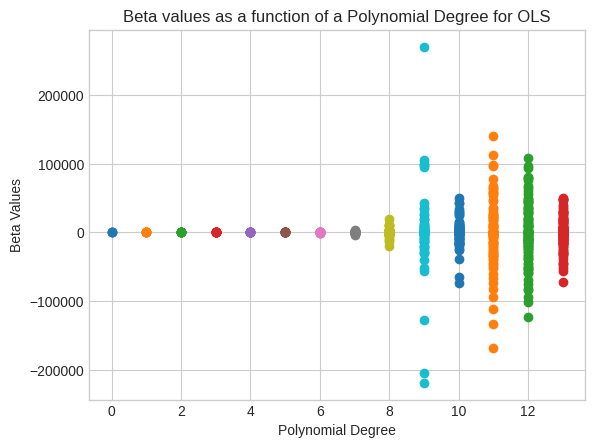

In [13]:
for degree, values in enumerate(beta_values):
    print("degree", degree, "betavalues", len(values))
    print(values)
    print(" ")
    degrees = np.repeat(degree, len(values))
    plt.scatter(degrees, values)

plt.xlabel('Polynomial Degree')
plt.ylabel('Beta Values')
plt.title('Beta values as a function of a Polynomial Degree for OLS')


# Ridge reproduction

In [14]:

degrees = np.arange(1, 15)

beta_ridge_values = []
mse_ridge_values = np.zeros(len(degrees))
R2_ridge_values = np.zeros(len(degrees))

lambda_values = np.logspace(-5, 3, 9)

for i, degree in enumerate(degrees): 
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X = poly_features.fit_transform(np.column_stack((x, y)))

    # Split the data into training and test data
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

    # Scale and center the data
    X_train, X_test = f.scale_train_test(train = X_train, test = X_test)
    z_train, z_test = f.scale_train_test(train = z_train, test = z_test)

    mse_temp = np.zeros(len(lambda_values))
    for j, lambda_ in enumerate(lambda_values):
        #Calculating OLSbeta, ztilde, mse and R2
        Ridgebeta = f.beta_ridge(X_train, z_train, lambda_)
        ztilde = f.z_predict(X_test, Ridgebeta)
        mse = f.mse(z_test, ztilde)
        mse_temp[j] = mse

    j = np.argmin(mse_temp)
    Ridgebeta = f.beta_ridge(X_train, z_train, lambda_values[j])
    ztilde = f.z_predict(X_test, Ridgebeta)

    #Adding the values to the arrays
    beta_ridge_values.append(Ridgebeta)
    mse_ridge_values[i] = f.mse(z_test, ztilde)
    R2_ridge_values[i] = f.r2(z_test, ztilde)



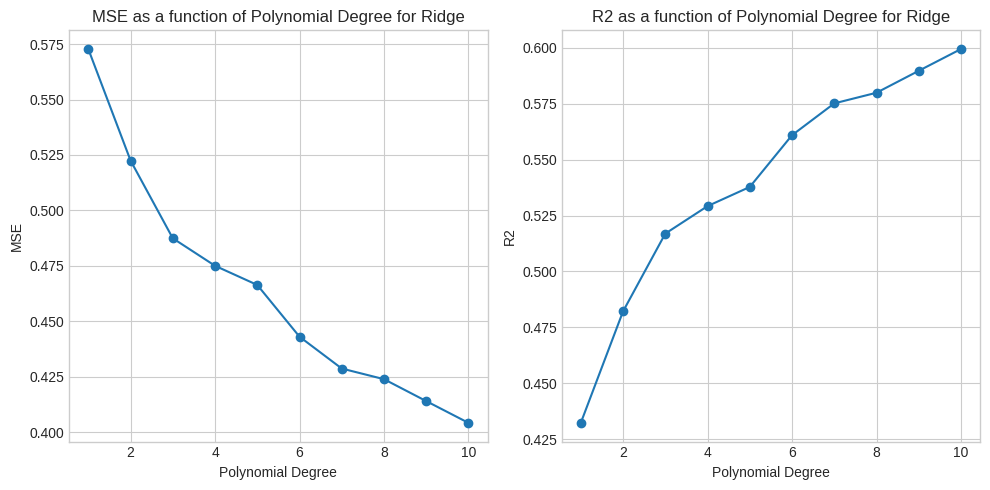

In [15]:
# Plotting MSE and R2 scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_ridge_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE as a function of Polynomial Degree for Ridge')

plt.subplot(1, 2, 2)
plt.plot(degrees, R2_ridge_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.title('R2 as a function of Polynomial Degree for Ridge')
plt.tight_layout()
plt.show()

degree 0 betavalues 3
[[ 0.        ]
 [-0.29890466]
 [-0.58615568]]
 
degree 1 betavalues 6
[[ 0.        ]
 [ 0.15261905]
 [-1.27833023]
 [-0.5939833 ]
 [ 0.18829482]
 [ 0.58750724]]
 
degree 2 betavalues 10
[[ 0.        ]
 [ 0.37476934]
 [-0.9688517 ]
 [-1.35609626]
 [ 0.96101567]
 [-1.2469778 ]
 [ 0.24876513]
 [ 0.49165975]
 [-1.18382416]
 [ 1.73132796]]
 
degree 3 betavalues 15
[[ 0.        ]
 [ 1.51233562]
 [-0.27376741]
 [-5.67400379]
 [ 0.68324055]
 [-5.25704034]
 [ 5.37273369]
 [ 2.87590914]
 [-3.41636374]
 [ 9.34726775]
 [-2.08655092]
 [-0.87267212]
 [-0.79625371]
 [ 1.9212694 ]
 [-4.29945141]]
 
degree 4 betavalues 21
[[ 0.00000000e+00]
 [-1.02667732e-02]
 [-2.66854076e+00]
 [ 2.50925311e+00]
 [ 4.21039109e+00]
 [ 8.68150679e+00]
 [-1.21195710e+01]
 [-1.66973228e+00]
 [-1.14818452e+01]
 [-2.21525622e+01]
 [ 1.33485785e+01]
 [ 4.73577349e+00]
 [ 2.79513334e+00]
 [ 8.37441795e+00]
 [ 2.75450863e+01]
 [-4.55370877e+00]
 [-4.34060129e+00]
 [ 3.11066952e+00]
 [-5.23248899e+00]
 [-4

Text(0.5, 1.0, 'Beta values as a function of a Polynomial Degree for Ridge')

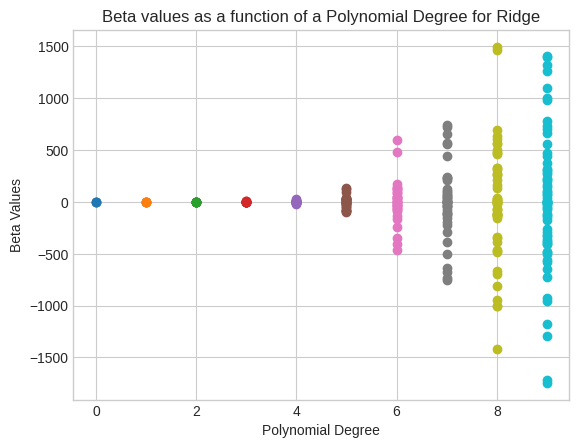

In [16]:
for degree, values in enumerate(beta_ridge_values):
    print("degree", degree, "betavalues", len(values))
    print(values)
    print(" ")
    degrees = np.repeat(degree, len(values))
    plt.scatter(degrees, values)

plt.xlabel('Polynomial Degree')
plt.ylabel('Beta Values')
plt.title('Beta values as a function of a Polynomial Degree for Ridge')

## Retrieve the estimated z_values

In [ ]:
#use the latest prediction as it has the best score 
ztilde = f.z_predict(X, Ridgebeta)

In [ ]:
ztildev = ztilde.flatten()
print(ztilde.shape)
ztildev = ztilde.reshape(361, 181)
print(ztildev.shape)

In [ ]:
# Create the heatmap
#aspect_ratio = xv.shape[1] / yv.shape[0]
#plt.figure(figsize=(5, 5 / aspect_ratio))

heatmap = plt.pcolormesh(xv, yv, ztildev, cmap='viridis')

# Add color bar
plt.colorbar(heatmap)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap of sampled terrain data')
plt.gca().invert_yaxis()

# Lasso Reproduction

In [ ]:
degrees = np.arange(1, 9)

beta_lasso_values = []
mse_lasso_values = np.zeros(len(degrees))
R2_lasso_values = np.zeros(len(degrees))

lambda_values = np.logspace(-5, -3, 2)

for i, degree in enumerate(degrees): 
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X = poly_features.fit_transform(np.column_stack((x, y)))

    # Split the data into training and test data
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

    # Scale and center the data
    X_train, X_test = f.scale_train_test(train = X_train, test = X_test)
    z_train, z_test = f.scale_train_test(train = z_train, test = z_test)
    
    mse_temp = np.zeros(len(lambda_values))

    for j, lambda_ in enumerate(lambda_values):
        # Create and fit the linear regression model
        model = Lasso(alpha = lambda_values[j], tol = 1e-2, selection = 'random', precompute=True, fit_intercept=False, max_iter=10000) #selection = "random"
        model.fit(X_train, z_train)

        # Make predictions for training and test data
        z_train_pred = model.predict(X_train)
        z_test_pred = model.predict(X_test)
        #print(z_train_pred.shape)

        # Compute mean squared error for training and test data
        #mse_train = f.mse(z_train, z_train_pred)
        mse_test = f.r2(z_test, z_test_pred)

        mse_temp[j] = mse_test

    j = np.argmin(mse_temp)
    print(lambda_values[j])
     # Create and fit the linear regression model with the optimal lambda value
    model = Lasso(alpha = lambda_values[j], tol = 1e-2, selection = 'random', precompute=True, fit_intercept=False, max_iter=10000)
    model.fit(X_train, z_train)

    # Make predictions for training and test data
    z_train_pred = model.predict(X_train)
    z_test_pred = model.predict(X_test)

    Lassobeta = model.coef_

    #Adding the values to the arrays
    beta_lasso_values.append(Lassobeta)
    mse_lasso_values[i] = f.mse(z_test, z_test_pred)
    R2_lasso_values[i] = f.r2(z_test, z_test_pred)


In [ ]:
# Plotting MSE and R2 scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_lasso_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE as a function of Polynomial Degree for Lasso')

plt.subplot(1, 2, 2)
plt.plot(degrees, R2_lasso_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.title('R2 as a function of Polynomial Degree for Lasso')
plt.tight_layout()
plt.show()

In [ ]:
for degree, values in enumerate(beta_lasso_values):
    print("degree", degree, "betavalues", len(values))
    print(values)
    print(" ")
    degrees = np.repeat(degree, len(values))
    plt.scatter(degrees, values)

plt.xlabel('Polynomial Degree')
plt.ylabel('Beta Values')
plt.title('Beta values as a function of a Polynomial Degree for Lasso')

# Plotting OLS and Ridge together

In [ ]:
degrees = np.arange(1, 30)
# Plotting MSE and R2 scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_values, marker='o', label='OLS')
plt.plot(degrees, mse_ridge_values, marker='o', label='Ridge')
#plt.plot(degrees, mse_lasso_values, marker='o', label='Lasso')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE as a function of Polynomial Degree')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(degrees, R2_values, marker='o', label='OLS')
plt.plot(degrees, R2_ridge_values, marker='o', label='Ridge')
#plt.plot(degrees, R2_lasso_values, marker='o', label='Lasso')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.title('R2 as a function of Polynomial Degree')
plt.tight_layout()
plt.legend()
plt.show()